# Libraary

In [39]:
import pickle
import numpy as np
import pandas as pd
import json
import os
import glob

# Functions

In [48]:
def plot_data_dict_acc_in_pdf(data: dict, title="", path='./figures/', legend_loc=f'lower right',linewidth=None, figsize=None, show=False):
    import os
    import matplotlib.pyplot as plt

    if not os.path.exists(path):
        os.makedirs(path)

    # Create a plot
    X = data["x"]
    file_name = data['name']
    if data["dual_axis"]:
        fig, ax1 = plt.subplots()
        Y_1, Y_2 = data["y"]
        Legend_1, Legend_2 = data["legends"]
        label_x, (label_y1, label_y2) = data["labels"]

        ax1.set_xlabel(label_x)
        ax1.set_ylabel(label_y1, color='b')
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # List of colors
        for i, (Y, legend) in enumerate(zip(Y_1, Legend_1)):
            ax1.plot(X, Y, label=legend, color=colors[i % len(colors)])  # Use modulo to loop through colors
        ax1.legend(loc='upper left')

        ax2 = ax1.twinx()
        ax2.set_xlabel(label_x)
        ax2.set_ylabel(label_y2, color='r')
        for i, (Y, legend) in enumerate(zip(Y_2, Legend_2)):
            ax2.plot(X, Y, label=legend, color=colors[(i + len(Y_1)) % len(colors)])  # Start from a new color
        ax2.legend(loc='lower right')

        max_acc = data["max_acc_g"]
        plt.title(title+f":max({max_acc})")        
    else:
        if figsize is not None:
            plt.figure(figsize=figsize)
        plt.grid()
        Y = data["y"]
        Legends = data["legends"]
        label_x, label_y = data["labels"]
        for y in Y:
            print(f'Length-> X={len(X)}, Y={len(y)}')
            if linewidth is not None:
                plt.plot(X, y, linewidth=linewidth)
            else: plt.plot(X,y)
        plt.xlabel(label_x)
        plt.ylabel(label_y)
        plt.title(title)
        plt.legend(Legends, loc = legend_loc )

    # Save the plot as a PDF file
    plt.savefig(f'{path}{file_name}.pdf', bbox_inches='tight')
    # Show the plot (optional)
    if show:
        plt.show()

## Filenames for creating plot figure

In [67]:
dataset ="cifar"
model = "resnet8"
n_class = 6
lr = "0_01"
bs = 16
round = 400
# exp_name = f"M_resnet8_cifar_nc_2_synthetic_L_CE_lr_0_01_B_16_C_15_E_5_400"
exp_name = f'M_{model}_{dataset}_nc_{n_class}_synthetic_L_CE_lr_{lr}_B_{bs}_C_15_E_5_{round}'

# Define the directory and pattern to list files
directory = f'/home/sujit/Github/Plotting_Graphs/experiments_{dataset}/{exp_name}'
pattern = '*.json'

# Get the list of files matching the pattern
file_pattern = os.path.join(directory, pattern)
files = glob.glob(file_pattern)

print("Files in the directory:")
for file in files:
    print(file.split('/')[-1].split("_")[0])

# s_file = files[0].split('/')
# method = s_file[-1].split("_")[0]
# print(method)

Files in the directory:
scaffold
proposedCSS
fedavgm
fedproposedScaffold
fedavg
feddyn
fedlada
fedprox
elastic


Length-> X=400, Y=400
Length-> X=400, Y=401


ValueError: x and y must have same first dimension, but have shapes (400,) and (401,)

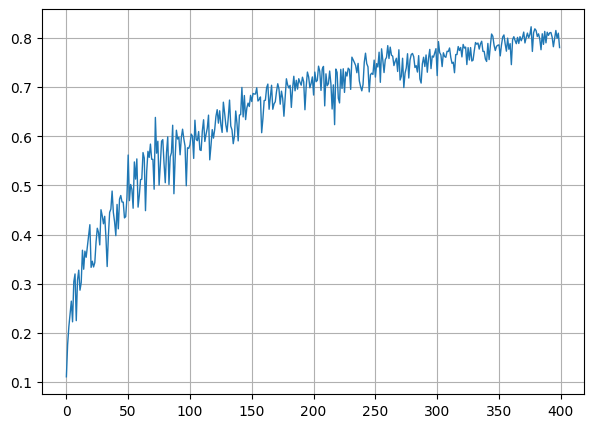

In [68]:
X=None
Y, L=[], []
Legends = []
for file in files:
    with open(file, 'r') as f:
        # Load the JSON data
        data = json.load(f)
        x = data['x']
        y, l = data['y']
        if X is not None:
            if len(X)>len(x):
                X = x
        else: X = x
        # print(f'Y length: {len(y)}, \n{y}')
        Y.append(y[0])
        L.append(l[0])
        # print(data.keys())
        s_file = file.split('/')
        method = s_file[-1].split("_")[0]
        Legends.append(method)
plot_data_dict_acc = {}
plot_data_dict_acc["name"] = f'{exp_name}_acc'
plot_data_dict_acc['x'] = X
plot_data_dict_acc['y'] = [y[:len(X)] for y in Y]
plot_data_dict_acc["legends"] = Legends
plot_data_dict_acc["labels"] = ["Rounds", "Top 1 accuracy"]
plot_data_dict_acc["dual_axis"] = False
Title = f'Title'
path = f'./figures/{exp_name}/'
plot_data_dict_acc_in_pdf(data=plot_data_dict_acc, path=path, linewidth=1, figsize=[7,5], show=True )
window_size = 3
for y,method in zip(Y, Legends):
    LOG_CSV = ''
    for i in range(len(X)):
        LOG_CSV +=f'{str(X[i])} {str(np.mean(y[max(i-window_size, 0):i+1]))}\n'
    LOG_CSV +='};'
    sav_instance_path = f'./Tables/{exp_name}/'
    if not os.path.exists(sav_instance_path):
        os.makedirs(sav_instance_path)
    with open(sav_instance_path + method +'.table', 'w' ) as f:
        f.write(LOG_CSV)